THIS PARTICULAR NOTEBOOK CONTAINS PREDICTION RESULTS OF COMBO - IC50 VALUES USING GRADIENT BOOSTING ALGORITHM, TEST AND VALIDATION SETS WERE USED TO VALIDATE THE RESULTS. DATA SET USED WAS EXTENSIVELY PROCESSED FOR SKEWNESS AND KURTOSIS TOO...

In [1]:
import pandas as pd
import os

# Specify the directory path where the Excel files are located
directory_path = 'D:\combo_IC50_skew_kurt_data'  # Replace with the actual directory path

# Get a list of Excel files in the specified directory
csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Loop through the Excel files and concatenate them
for file in csv_files:
    df = pd.read_csv(file)  # Read each Excel file
    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# Now, 'concatenated_df' contains the combined data from all Excel files in the specified directory.

# You can further process or save the concatenated DataFrame as needed.
valid_data = pd.read_csv(r'D:\combo_IC50_skew_kurt_data\validation\chunk_14.csv')

In [2]:
concatenated_df.columns.tolist()

['Cell Line name',
 'SDIM',
 'Tissue',
 'Cancer Type',
 'Anchor Name',
 'Anchor Target',
 'Anchor Pathway',
 'Anchor Conc',
 'Library Name',
 'library Target',
 ' Library Pathway',
 'Maxc',
 'Library IC50',
 'Library Emax',
 'Bliss Emax',
 'Combo Emax',
 'Delta Xmid',
 'Delta Emax',
 'Synergy?',
 'ATS1p_x',
 'apol_x',
 'Sp_x',
 'ATS0v_x',
 'ZMIC0_x',
 'ATS1v_x',
 'Sv_x',
 'ATSC0v',
 'McGowan_Volume_x',
 'CrippenMR',
 'ATS2p_x',
 'nBonds2',
 'nHeavyAtom_x',
 'ATS2v_x',
 'ATS3p_x',
 'WTPT-1_x',
 'VR3_D',
 'ATS1i',
 'nAtom',
 'Spe',
 'Sare',
 'ATS3v_x',
 'Si',
 'nBonds',
 'nC',
 'nBondsS3',
 'ATS0p',
 'TIC1',
 'ATS4p',
 'ATS0i',
 'Zagreb_x',
 'TIC4',
 'TIC5',
 'nBondsS',
 'nBondsS2',
 'TIC3',
 'ATS2e',
 'AMR_x',
 'TIC2',
 'MPC2',
 'ATSC1m_x',
 'AATSC0v',
 'PetitjeanNumber',
 'AATS4i',
 'AATS4e',
 'AATS3e',
 'AATS3i',
 'VE1_Dt',
 'SIC3',
 'SIC4',
 'AATSC0p',
 'SIC5',
 'AATSC1m_x',
 'BIC3',
 'AATSC2c_x',
 'topoShape_x',
 'topoRadius_x',
 'WPATH_x',
 'SpAD_D_x',
 'SpMax_D_x',
 'SpDiam_D_x',


In [3]:
concatenated_df

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1,Combo IC50
0,-0.594742,-0.594742,0.0,0.0,1.149135,1.149135,1.053985,0.586058,-0.255221,-0.158462,...,-0.769550,-0.499326,-0.555155,0.264339,-0.473616,-0.447850,-0.070525,-0.613131,-0.826328,12.690692
1,-0.683066,-0.683066,0.0,0.0,0.778971,0.778971,0.745955,-1.303838,0.662210,0.772391,...,-0.206117,0.054180,-0.658952,-0.864448,-0.426859,-0.247622,0.269824,-0.910423,-0.109546,15.350248
2,1.083119,1.083119,0.0,0.0,-1.403398,-1.403398,-0.796785,0.759422,-0.544596,-0.468959,...,-0.415908,0.547891,-1.658487,0.263687,-1.071368,-1.231359,-2.329312,-1.258447,-1.017625,10.710601
3,0.615130,0.615130,0.0,0.0,0.362013,0.362013,0.210389,0.038221,0.807659,0.878693,...,-1.042620,-0.606483,0.229506,1.814737,0.608203,1.112921,0.820116,0.107493,0.405116,8.545300
4,1.126420,1.126420,0.0,0.0,1.320941,1.320941,1.197459,-1.083011,-1.177607,-1.148174,...,0.370918,0.127499,-0.161969,-1.216652,-0.590462,-0.288751,-0.044123,-0.598535,-0.338686,8.351068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143607,-1.373184,-1.373184,0.0,0.0,-0.411232,-0.411232,0.210389,-0.805546,-0.972988,-0.928620,...,-0.641391,0.717184,-1.227046,-0.240562,-0.819111,-0.723829,-1.674816,-1.103345,-0.707052,14.614905
143608,-0.982697,-0.982697,0.0,0.0,0.129245,0.129245,0.210389,0.038221,1.295998,1.323176,...,0.121220,0.738434,0.587082,1.548027,0.878676,0.867161,0.522169,0.940913,0.268076,10.885169
143609,0.994817,0.994817,0.0,0.0,1.149135,1.149135,1.053985,0.586058,-2.128216,-2.168169,...,0.151173,0.875372,0.339178,0.400854,-0.216762,-0.185623,-0.454183,-0.107921,0.366047,5.535373
143610,1.415486,1.415486,0.0,0.0,1.320941,1.320941,1.197459,-1.083011,0.404717,0.491596,...,2.021868,-2.381152,1.350208,1.347834,-0.603477,0.926332,2.017283,0.056458,-0.875521,13.208833


In [4]:
#inversing the standardization process and obtaining the real values back!
# Create a StandardScaler object
#scaler = StandardScaler()

# Fit the scaler to your standardized data (This step is only needed if you didn't store the original mean and std_ attributes)
#scaler.fit(encoded_df_desc_std)

# Inverse transform the standardized data to get it back to the original scale
#original_data = scaler.inverse_transform(encoded_df_desc_std)

for the first attempt with the 90 % threshold limit for filtering columns as per dimentionality reduction and merging the reduced padel descriptors with original breast cancer combination data, making the transformations to reduce kurtosis and skewness (only for indepoendent variables) and  taking combo IC50 as a dependent variables, a regressin prediction is being done based on GRADIENT BOOSTING ALGORITHM.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [6]:
X = concatenated_df.drop('Combo IC50', axis = 1)
X

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB2m.1,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1
0,-0.594742,-0.594742,0.0,0.0,1.149135,1.149135,1.053985,0.586058,-0.255221,-0.158462,...,-0.555155,-0.769550,-0.499326,-0.555155,0.264339,-0.473616,-0.447850,-0.070525,-0.613131,-0.826328
1,-0.683066,-0.683066,0.0,0.0,0.778971,0.778971,0.745955,-1.303838,0.662210,0.772391,...,-0.658952,-0.206117,0.054180,-0.658952,-0.864448,-0.426859,-0.247622,0.269824,-0.910423,-0.109546
2,1.083119,1.083119,0.0,0.0,-1.403398,-1.403398,-0.796785,0.759422,-0.544596,-0.468959,...,-1.658487,-0.415908,0.547891,-1.658487,0.263687,-1.071368,-1.231359,-2.329312,-1.258447,-1.017625
3,0.615130,0.615130,0.0,0.0,0.362013,0.362013,0.210389,0.038221,0.807659,0.878693,...,0.229506,-1.042620,-0.606483,0.229506,1.814737,0.608203,1.112921,0.820116,0.107493,0.405116
4,1.126420,1.126420,0.0,0.0,1.320941,1.320941,1.197459,-1.083011,-1.177607,-1.148174,...,-0.161969,0.370918,0.127499,-0.161969,-1.216652,-0.590462,-0.288751,-0.044123,-0.598535,-0.338686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143607,-1.373184,-1.373184,0.0,0.0,-0.411232,-0.411232,0.210389,-0.805546,-0.972988,-0.928620,...,-1.227046,-0.641391,0.717184,-1.227046,-0.240562,-0.819111,-0.723829,-1.674816,-1.103345,-0.707052
143608,-0.982697,-0.982697,0.0,0.0,0.129245,0.129245,0.210389,0.038221,1.295998,1.323176,...,0.587082,0.121220,0.738434,0.587082,1.548027,0.878676,0.867161,0.522169,0.940913,0.268076
143609,0.994817,0.994817,0.0,0.0,1.149135,1.149135,1.053985,0.586058,-2.128216,-2.168169,...,0.339178,0.151173,0.875372,0.339178,0.400854,-0.216762,-0.185623,-0.454183,-0.107921,0.366047
143610,1.415486,1.415486,0.0,0.0,1.320941,1.320941,1.197459,-1.083011,0.404717,0.491596,...,1.350208,2.021868,-2.381152,1.350208,1.347834,-0.603477,0.926332,2.017283,0.056458,-0.875521


In [7]:
Y = concatenated_df['Combo IC50']
Y = pd.DataFrame(Y)
Y

,Combo IC50
0,12.690692
1,15.350248
2,10.710601
3,8.545300
4,8.351068
...,...
143607,14.614905
143608,10.885169
143609,5.535373
143610,13.208833


In [8]:
X_valid = valid_data.drop('Combo IC50', axis = 1)
Y_valid = valid_data['Combo IC50']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2541)

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

In [11]:
# Instantiate Gradient Boosting Regressor with early stopping
model = GradientBoostingRegressor(loss='absolute_error',
                                   learning_rate=0.08,
                                   n_estimators=10000,
                                   max_depth=1,
                                   random_state=6020,
                                   max_features=8)  # Tolerance to declare convergence

In [12]:
#model.fit(X_train, Y_train)
#Y_pred = model.predict(X_test)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [16]:
# Fit the model to the training data
model.fit(X_train, Y_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(model)



A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KeyError: 0

In [17]:
# Calculate SHAP values for a specific prediction (e.g., the first test sample)
shap_values = explainer.shap_values(X_test.iloc[0])




AssertionError: Summary plots need a matrix of shap_values, not a vector.

In [19]:
shap_values

array([-0.02428333, -0.12289961,  0.        , ...,  0.01474524,
       -0.000149  ,  0.0016428 ])

In [18]:
# Visualize the SHAP values for that prediction using a force plot
shap.initjs()  # Initialize JavaScript visualization (required for force plots)
shap.force_plot(explainer.expected_value[0], shap_values, X_test.iloc[0])


In [23]:
import numpy as np
# Assuming you have already calculated shap_values for a specific prediction

# Calculate the absolute SHAP values for the specific prediction
abs_shap_values = np.abs(shap_values)

# Sort the absolute SHAP values in descending order to identify the top features
sorted_indices = np.argsort(abs_shap_values)[::-1]

# Select the top 20 features and their corresponding SHAP values
top_20_indices = sorted_indices[:20]
top_20_features = X_test.columns[top_20_indices]
top_20_shap_values = shap_values[top_20_indices]




In [24]:
top_20_shap_values

array([ 1.56933062,  0.73255395,  0.42744313,  0.28268812,  0.25349966,
        0.21400673,  0.15514337,  0.13176365, -0.12289961,  0.12162562,
        0.12079558,  0.12059663,  0.11052658, -0.1075233 ,  0.1029823 ,
        0.09495359,  0.08219285,  0.07712309,  0.07605348,  0.06755027])

In [27]:
# Create a DataFrame with only the top 20 features for the specific prediction
top_20_features_df = X_test.iloc[0][top_20_features]





AssertionError: Summary plots need a matrix of shap_values, not a vector.

In [28]:
top_20_features_df

Delta Xmid     -1.805628
Combo Emax      0.936400
Library Emax    0.497584
Bliss Emax      0.541224
Delta Emax     -1.593644
maxsOm          4.573607
maxsOm.3        4.573607
JGI7           -3.298368
SDIM           -1.373184
minsOm.2        4.573607
VR1_D.8        -3.126479
VE3_Dt.1        2.857568
ATS1v_y        -2.961103
Library IC50    0.264838
VR2_Dt.1       -3.305122
MATS2c.1_y      1.597806
ATSC6i.3        0.477250
GATS5s.1_y     -4.623198
VR2_Dt.3       -3.305122
VR2_Dt_y       -3.305122
Name: 87812, dtype: float64

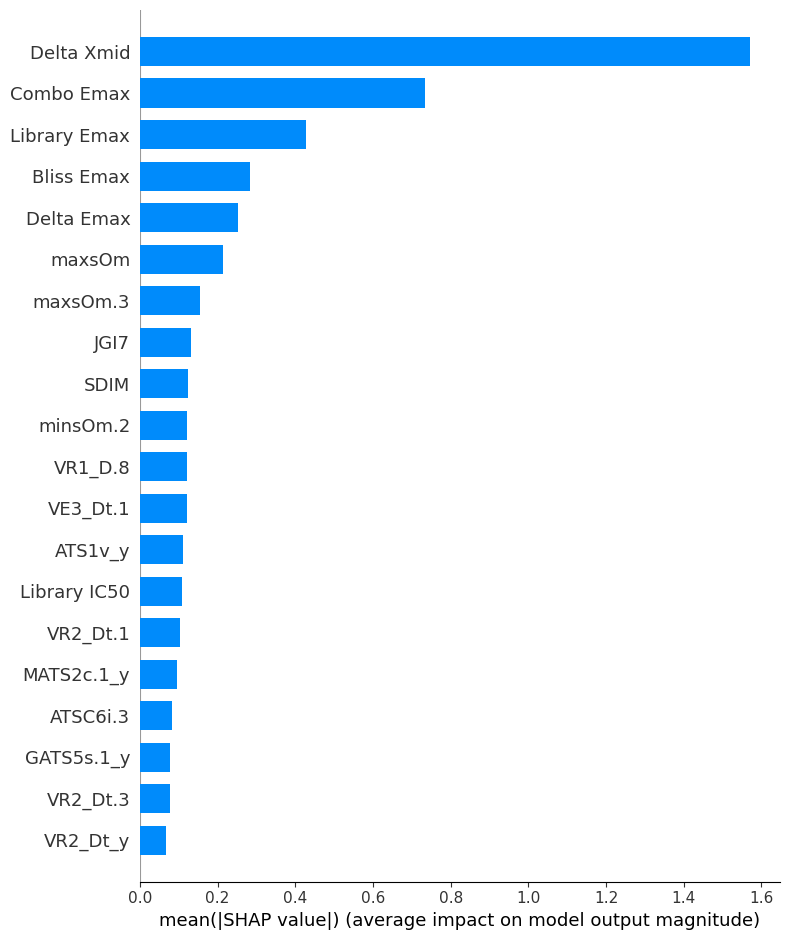

In [36]:
# Convert the top 20 features DataFrame to a matrix-like format
top_20_features_matrix = top_20_features_df.values.reshape(1, -1)

# Visualize the top 20 features and their SHAP values as a bar plot with feature names on the y-axis
shap.summary_plot(top_20_shap_matrix, top_20_features_matrix, plot_type='bar', feature_names=top_20_features)


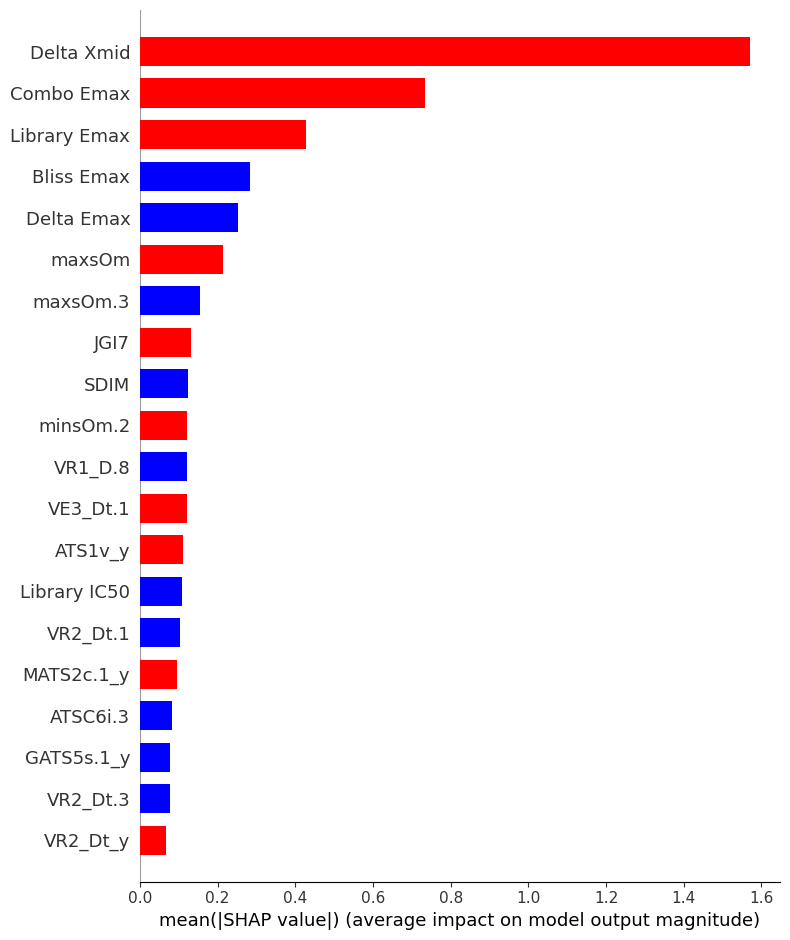

Delta Xmid     -1.805628
Combo Emax      0.936400
Library Emax    0.497584
Bliss Emax      0.541224
Delta Emax     -1.593644
maxsOm          4.573607
maxsOm.3        4.573607
JGI7           -3.298368
SDIM           -1.373184
minsOm.2        4.573607
VR1_D.8        -3.126479
VE3_Dt.1        2.857568
ATS1v_y        -2.961103
Library IC50    0.264838
VR2_Dt.1       -3.305122
MATS2c.1_y      1.597806
ATSC6i.3        0.477250
GATS5s.1_y     -4.623198
VR2_Dt.3       -3.305122
VR2_Dt_y       -3.305122
Name: 87812, dtype: float64

In [83]:

# this is based on the x axis values and not based on the dataframe values -- INCORRECT
# Define colors based on the sign of the values in top_20_features_df (Red for negative, Blue for positive)
colors = ['blue' if val >= 0 else 'red' for val in top_20_features_df]

# Visualize the top 20 features and their SHAP values as a bar plot with custom colors
shap.summary_plot(top_20_shap_matrix, top_20_features_matrix, plot_type='bar', feature_names=top_20_features,
                  title="Top 20 SHAP Values (Blue: Positive, Red: Negative)", color=colors)

# Show the plot
plt.show()
top_20_features_df

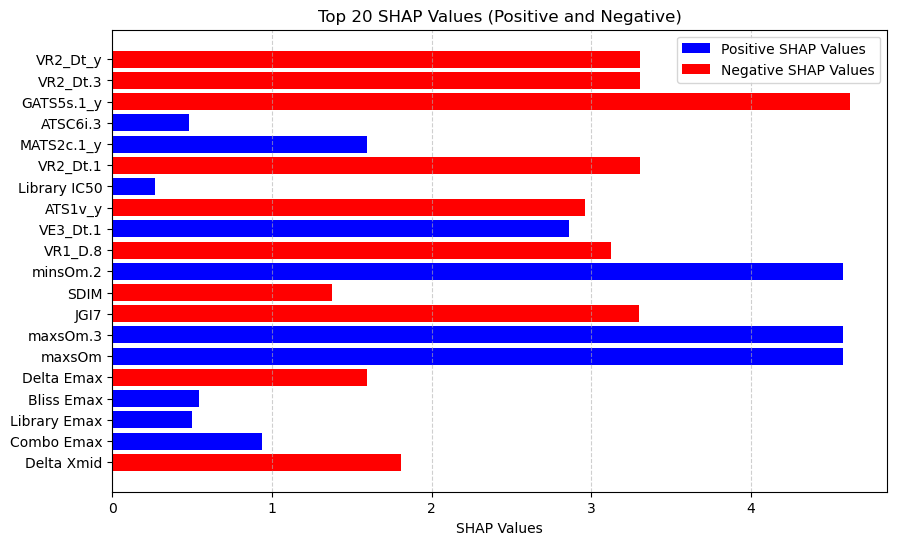

In [84]:
# Separate positive and negative SHAP values
positive_shap_values = [val if val >= 0 else 0 for val in top_20_features_df]
negative_shap_values = [-val if val < 0 else 0 for val in top_20_features_df]

# Create a list of positive and negative features with corresponding SHAP values
positive_features = [feature for feature, val in zip(top_20_features, positive_shap_values)]
negative_features = [feature for feature, val in zip(top_20_features, negative_shap_values)]

# Create a list of positive and negative colors
positive_colors = ['blue'] * len(positive_shap_values)
negative_colors = ['red'] * len(negative_shap_values)

# Create a two-sided bar graph
plt.figure(figsize=(10, 6))
plt.barh(positive_features, positive_shap_values, color=positive_colors, label='Positive SHAP Values')
plt.barh(negative_features, negative_shap_values, color=negative_colors, label='Negative SHAP Values')
plt.xlabel('SHAP Values')
plt.title('Top 20 SHAP Values (Positive and Negative)')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [48]:

import shap
import numpy as np
import matplotlib.pyplot as plt


# Initialize the SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values for a specific prediction (e.g., the first test sample)
shap_values = explainer.shap_values(X_test.iloc[0])

# Calculate the absolute SHAP values
abs_shap_values = np.abs(shap_values)

# Sort the absolute SHAP values in descending order to identify the top features
sorted_indices = np.argsort(abs_shap_values)[::-1]

# Separate positive and negative SHAP values
positive_indices = sorted_indices[shap_values[0] > 0]
negative_indices = sorted_indices[shap_values[0] < 0]

# Select the top 20 positive features and their corresponding SHAP values
top_20_positive_indices = positive_indices[:20]
top_20_positive_features = X_test.columns[top_20_positive_indices]
top_20_positive_shap_values = shap_values[0][top_20_positive_indices]

# Create a list of top 20 positive score SHAP values
top_20_positive_shap_values_list = top_20_positive_shap_values.tolist()

# Create a DataFrame with only the top 20 positive features for the specific prediction
top_20_positive_features_df = X_test.iloc[0][top_20_positive_features]

# Convert the top 20 positive features DataFrame to a matrix-like format
top_20_positive_features_matrix = top_20_positive_features_df.values.reshape(1, -1)

# Create a summary plot for the top 20 positive score SHAP values
shap.summary_plot(top_20_positive_shap_values, top_20_positive_features_matrix, plot_type='bar', feature_names=top_20_positive_features, title="Top 20 Positive Score SHAP Values")

# Show the plot
plt.show()

# Print the list of top 20 positive score SHAP values
print("Top 20 Positive Score SHAP Values:")
print(top_20_positive_shap_values_list)


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: GradientBoostingRegressor(learning_rate=0.08, loss='absolute_error',
                          max_depth=1, max_features=8, n_estimators=10000,
                          random_state=6020)

In [49]:
# Fit the model to the training data
model.fit(X_train, Y_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(model)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


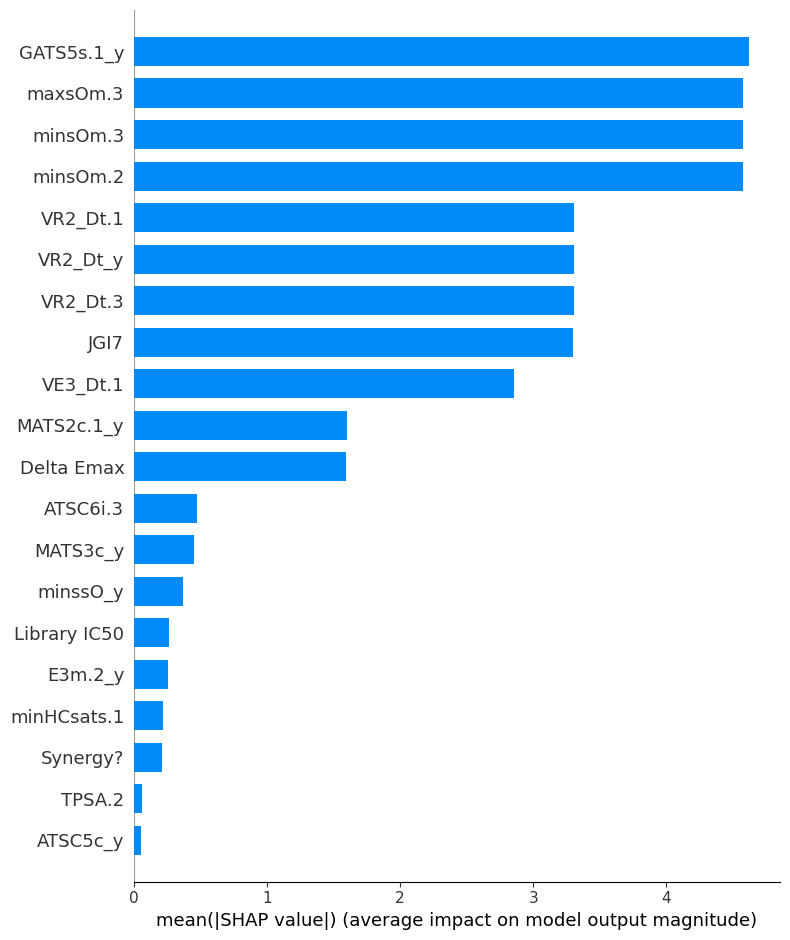

Top 20 Positive Score SHAP Values:
[0.25349965957015297, 0.155143374779324, 0.13176364924725523, 0.12162562328574797, 0.12059662680380388, -0.10752330048902513, 0.10298229548974837, 0.09495359298113086, 0.08219284790009147, 0.07712309456275834, 0.07605347819033001, 0.06755026926248335, -0.05879298704497897, 0.053924787277704604, 0.04920138608672817, -0.04671348932471543, 0.04340211819953584, 0.03942894589259662, 0.03774770534158025, 0.03739213670250149]


In [61]:
# Calculate SHAP values for a specific prediction (e.g., the first test sample)
shap_values = explainer.shap_values(X_test.iloc[0])

# Calculate the absolute SHAP values
abs_shap_values = np.abs(shap_values)

# Sort the absolute SHAP values in descending order to identify the top features
sorted_indices = np.argsort(abs_shap_values)[::-1]

# Separate positive and negative SHAP values
positive_indices = sorted_indices[shap_values > 0]
negative_indices = sorted_indices[shap_values < 0]

# Select the top 20 positive features and their corresponding SHAP values
top_20_positive_indices = positive_indices[:20]
top_20_positive_features = X_test.columns.to_numpy()[top_20_positive_indices]
top_20_positive_shap_values = shap_values[top_20_positive_indices]

# Create a list of top 20 positive score SHAP values
top_20_positive_shap_values_list = top_20_positive_shap_values.tolist()

# Create a DataFrame with only the top 20 positive features for the specific prediction
top_20_positive_features_df = X_test.iloc[0][top_20_positive_features]

# Convert the top 20 positive features DataFrame to a matrix-like format
top_20_positive_features_matrix = top_20_positive_features_df.values.reshape(1, -1)

# Create a summary plot for the top 20 positive score SHAP values
shap.summary_plot(top_20_positive_features_matrix, top_20_positive_features_matrix, plot_type='bar', feature_names=top_20_positive_features, title="Top 20 Positive Score SHAP Values")

# Show the plot
plt.show()

# Print the list of top 20 positive score SHAP values
print("Top 20 Positive Score SHAP Values:")
print(top_20_positive_shap_values_list)

In [68]:
positive_indices

array([  17, 1872, 2139, 1792, 1923,   12, 1765, 1563, 1940, 1920, 1921,
       1589, 1537, 2050, 1544, 1871,   18, 2337, 2353, 1631, 1608, 1771,
       2476, 1937, 1831, 2244, 1621, 1474, 2214, 2051, 2424, 2200, 2495,
       1682, 2359, 2416, 1934, 1407, 1722,  430, 2513, 1967, 2262, 2015,
       1751, 1645, 1484, 1479, 2345, 2391, 2060,  780, 1042, 1913, 1404,
       1961, 2121, 1573, 2058, 1594, 1290, 1421, 1184, 1222,   70, 1546,
       1419, 1733, 2389, 1055, 1569, 2268, 1966, 1403, 2283, 2298, 1331,
       2315, 1903, 1402,  304, 2324, 1584, 1794,   10, 2073, 1927, 2184,
       1737, 1749, 2235, 1971, 2339,  368, 1339,  316,  735, 1503, 2311,
        516, 2111,    6, 1212, 2261,  477, 2413, 1542, 2398, 1989, 2446,
       1748, 2451,  878, 2096, 1999, 1521, 2266, 2447, 1657, 1605, 2290,
       1987, 1519, 1914, 2444,  143, 1877, 2487, 2068,  226, 2125, 2173,
       1011, 2374, 2223, 1259, 1680, 2276, 1658, 2417, 1865, 1424,  448,
       2231,  578, 2486,  668, 1480, 1110, 1958, 12

In [69]:
negative_indices

array([  16,   15, 1702, ...,  733, 1467,  725], dtype=int64)

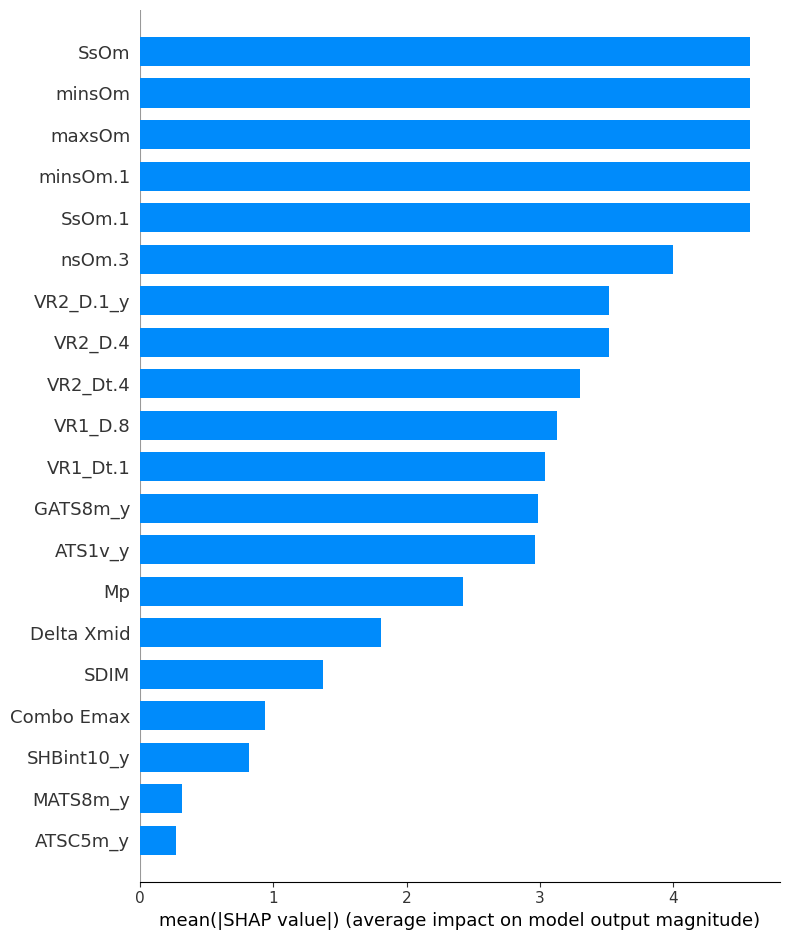

Top 20 Negative Score SHAP Values:
[1.5693306201762174, 0.7325539485709265, 0.2140067311830719, -0.12289961161336276, 0.12079558136277999, 0.11052657774338569, -0.06177266198774123, -0.059576553266325674, -0.04175611132347998, -0.038288338165860455, -0.03769442071521563, 0.03730311307555231, -0.031420799084837574, -0.03125673170172579, 0.030479753023845563, -0.028016356544519942, -0.026627709888373395, -0.025051530377641885, -0.02415537496382128, -0.023409004163859198]


In [64]:

# Select the top 20 positive features and their corresponding SHAP values
top_20_negative_indices = negative_indices[:20]
top_20_negative_features = X_test.columns.to_numpy()[top_20_negative_indices]
top_20_negative_shap_values = shap_values[top_20_negative_indices]

# Create a list of top 20 positive score SHAP values
top_20_negative_shap_values_list = top_20_negative_shap_values.tolist()

# Create a DataFrame with only the top 20 positive features for the specific prediction
top_20_negative_features_df = X_test.iloc[0][top_20_negative_features]

# Convert the top 20 positive features DataFrame to a matrix-like format
top_20_negative_features_matrix = top_20_negative_features_df.values.reshape(1, -1)

# Create a summary plot for the top 20 positive score SHAP values
shap.summary_plot(top_20_negative_features_matrix, top_20_negative_features_matrix, plot_type='bar', feature_names=top_20_negative_features, title="Top 20 Negative Score SHAP Values")

# Show the plot
plt.show()

# Print the list of top 20 positive score SHAP values
print("Top 20 Negative Score SHAP Values:")
print(top_20_negative_shap_values_list)

In [67]:


# Select the top 20 positive features and their corresponding SHAP values
top_20_negative_indices = negative_indices[:20]
top_20_negative_features = X_test.columns.to_numpy()[top_20_negative_indices]
top_20_negative_shap_values = [shap_values[0][i] for i in top_20_negative_indices]  # Ensure we use shap_values[0] for the specific prediction

# Create a list of top 20 positive score SHAP values
top_20_negative_shap_values_list = top_20_negative_shap_values.tolist()

# Create a DataFrame with only the top 20 positive features for the specific prediction
top_20_negative_features_df = X_test.iloc[0][top_20_negative_features]

# Convert the top 20 positive features DataFrame to a matrix-like format
top_20_negative_features_matrix = top_20_negative_features_df.values.reshape(1, -1)

# Create a summary plot for the top 20 positive score SHAP values
shap.summary_plot(top_20_negative_features_matrix, top_20_negative_features_matrix, plot_type='bar', feature_names=top_20_negative_features, title="Top 20 Negative Score SHAP Values")

# Show the plot
plt.show()

# Print the list of top 20 positive score SHAP values
print("Top 20 Negative Score SHAP Values:")
print(top_20_negative_shap_values_list)

IndexError: invalid index to scalar variable.

In [ ]:

Y_valid_pred = model.predict(X_valid)

In [13]:
import numpy as np
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)
evs = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", evs)

# for validation set
import numpy as np
mse = mean_squared_error(Y_valid, Y_valid_pred)
print("Mean Squared Error (validation set):", mse)
rmse = np.sqrt(mean_squared_error(Y_valid, Y_valid_pred))
print("Root Mean Squared Error (validation set):", rmse)
mae = mean_absolute_error(Y_valid, Y_valid_pred)
print("Mean Absolute Error (validation set):", mae)
r2 = r2_score(Y_valid, Y_valid_pred)
print("R-squared (validation set):", r2)
evs = explained_variance_score(Y_valid, Y_valid_pred)
print("Explained Variance Score (validation set):", evs)



Mean Squared Error: 0.860252010247905
Root Mean Squared Error: 0.9274977144165397
Mean Absolute Error: 0.621732022949457
R-squared: 0.921453035892023
Explained Variance Score: 0.921836485084502
Mean Squared Error (validation set): 0.8648805747316705
Root Mean Squared Error (validation set): 0.9299895562487088
Mean Absolute Error (validation set): 0.628538665225963
R-squared (validation set): 0.9222729919342353
Explained Variance Score (validation set): 0.9228331573578482


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


Cross-Validation Scores: [0.98102167 0.97927608 0.9769622  0.98045385 0.97940577 0.9803598
 0.97914951 0.98098817]


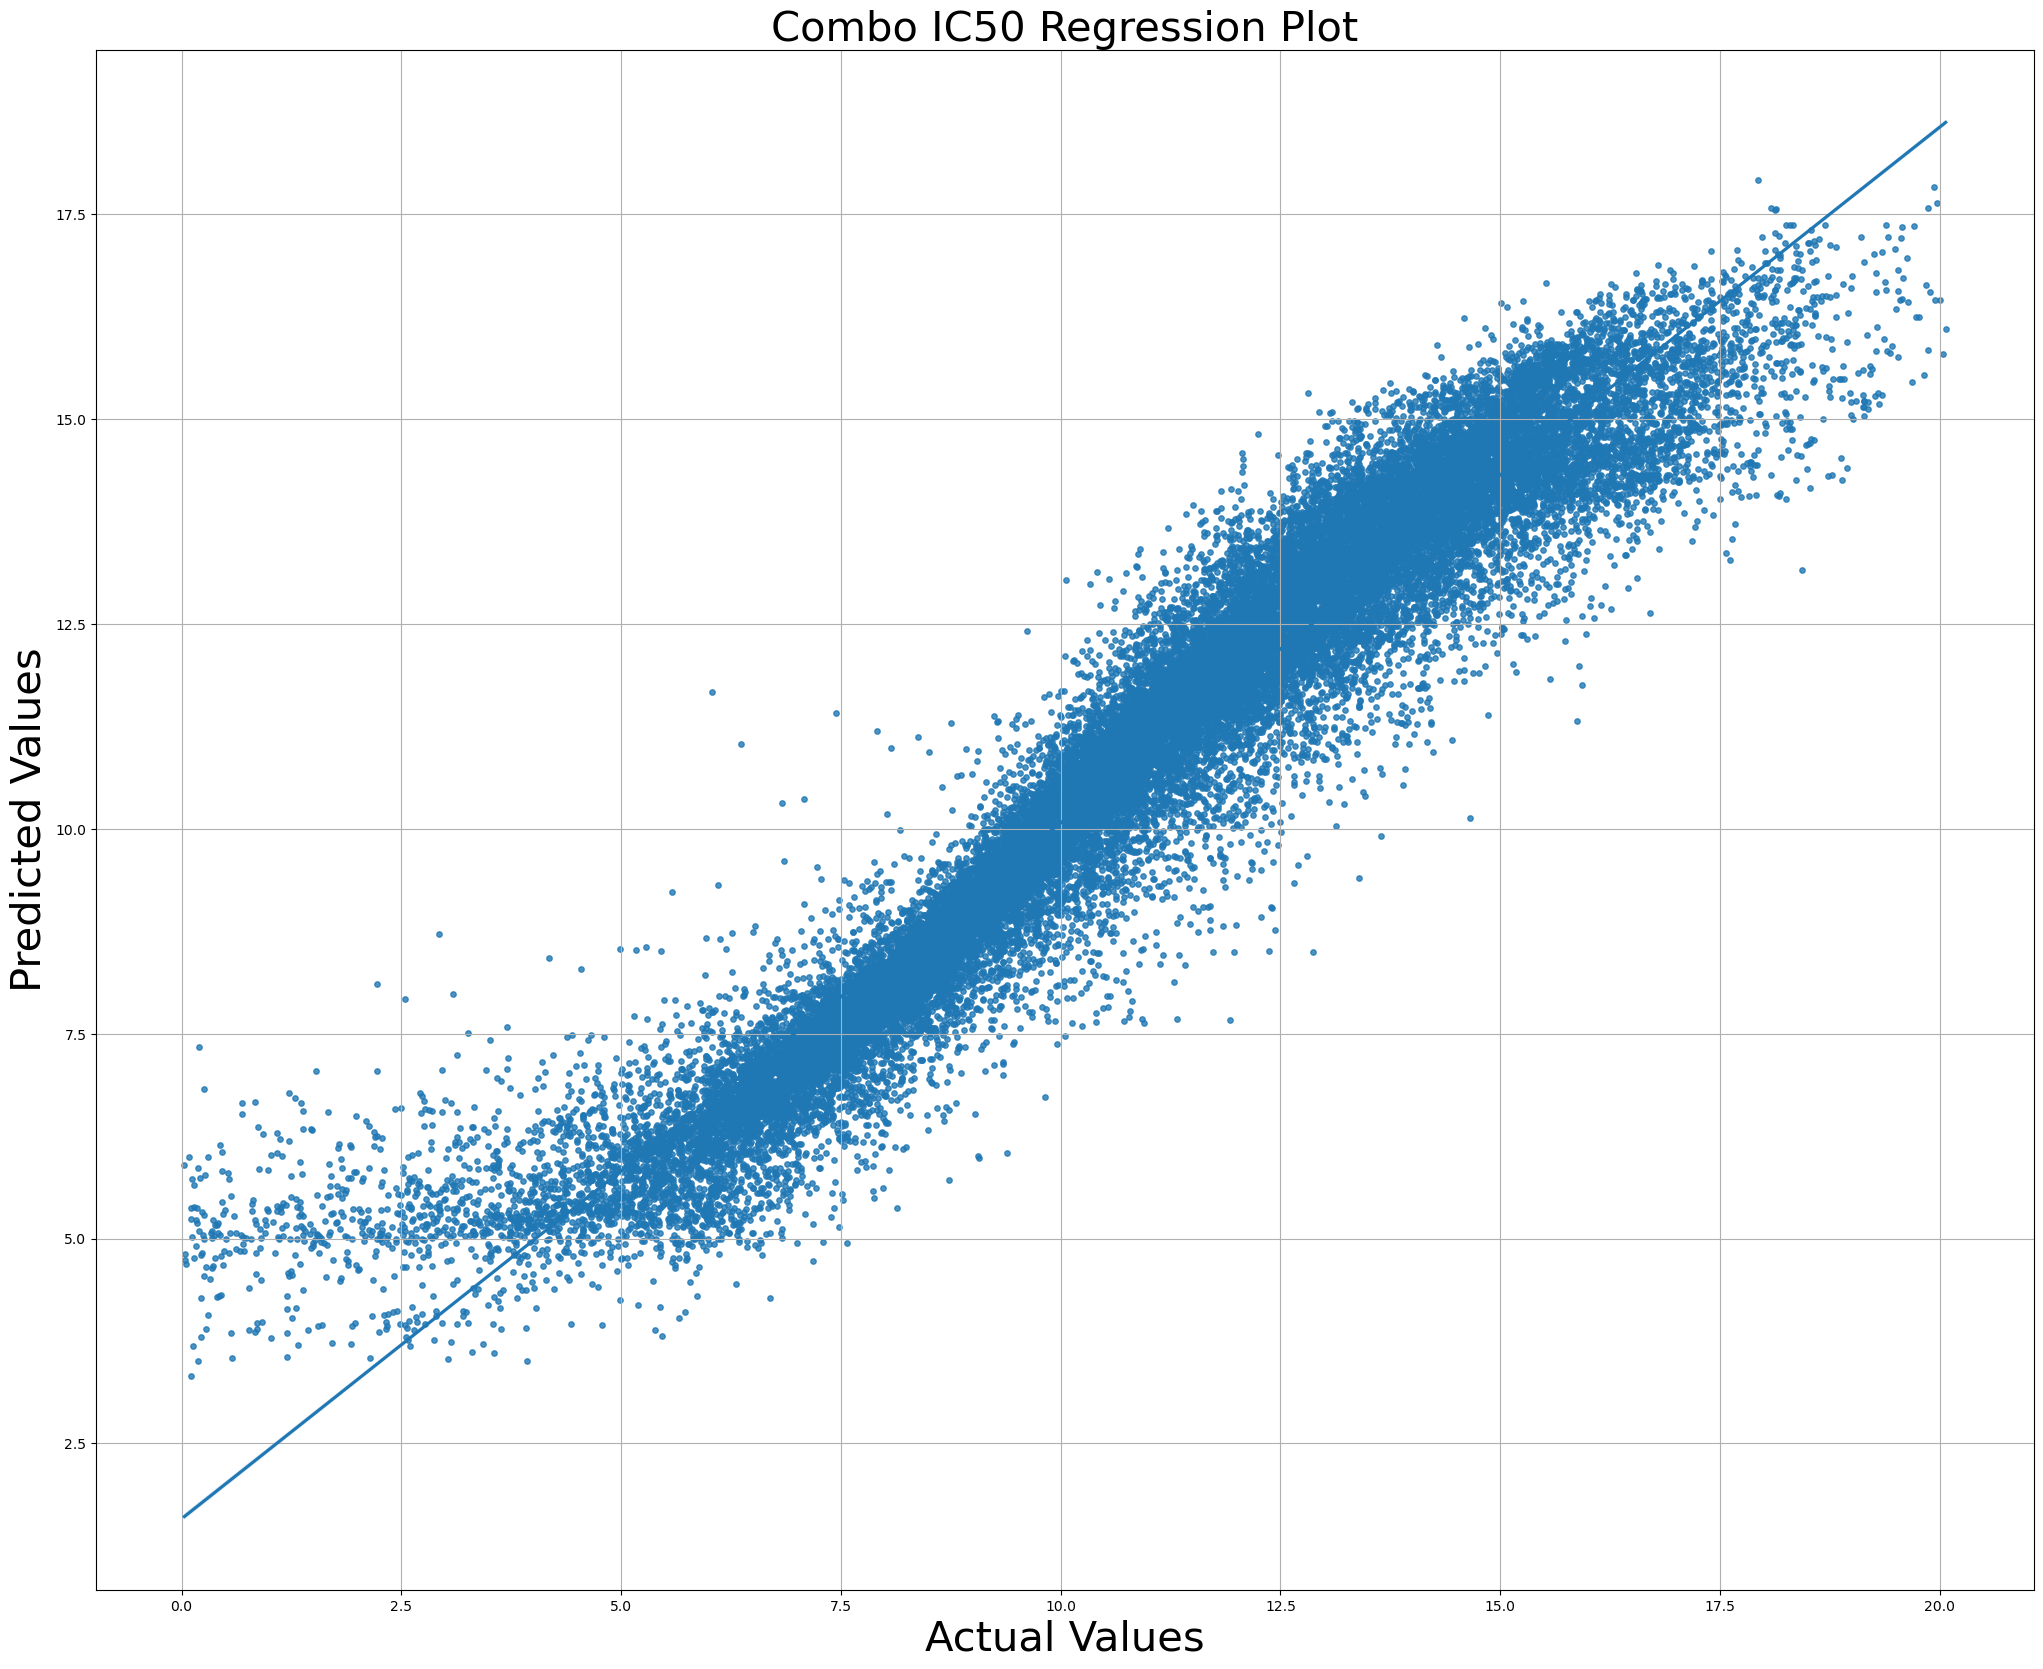

35903 35903


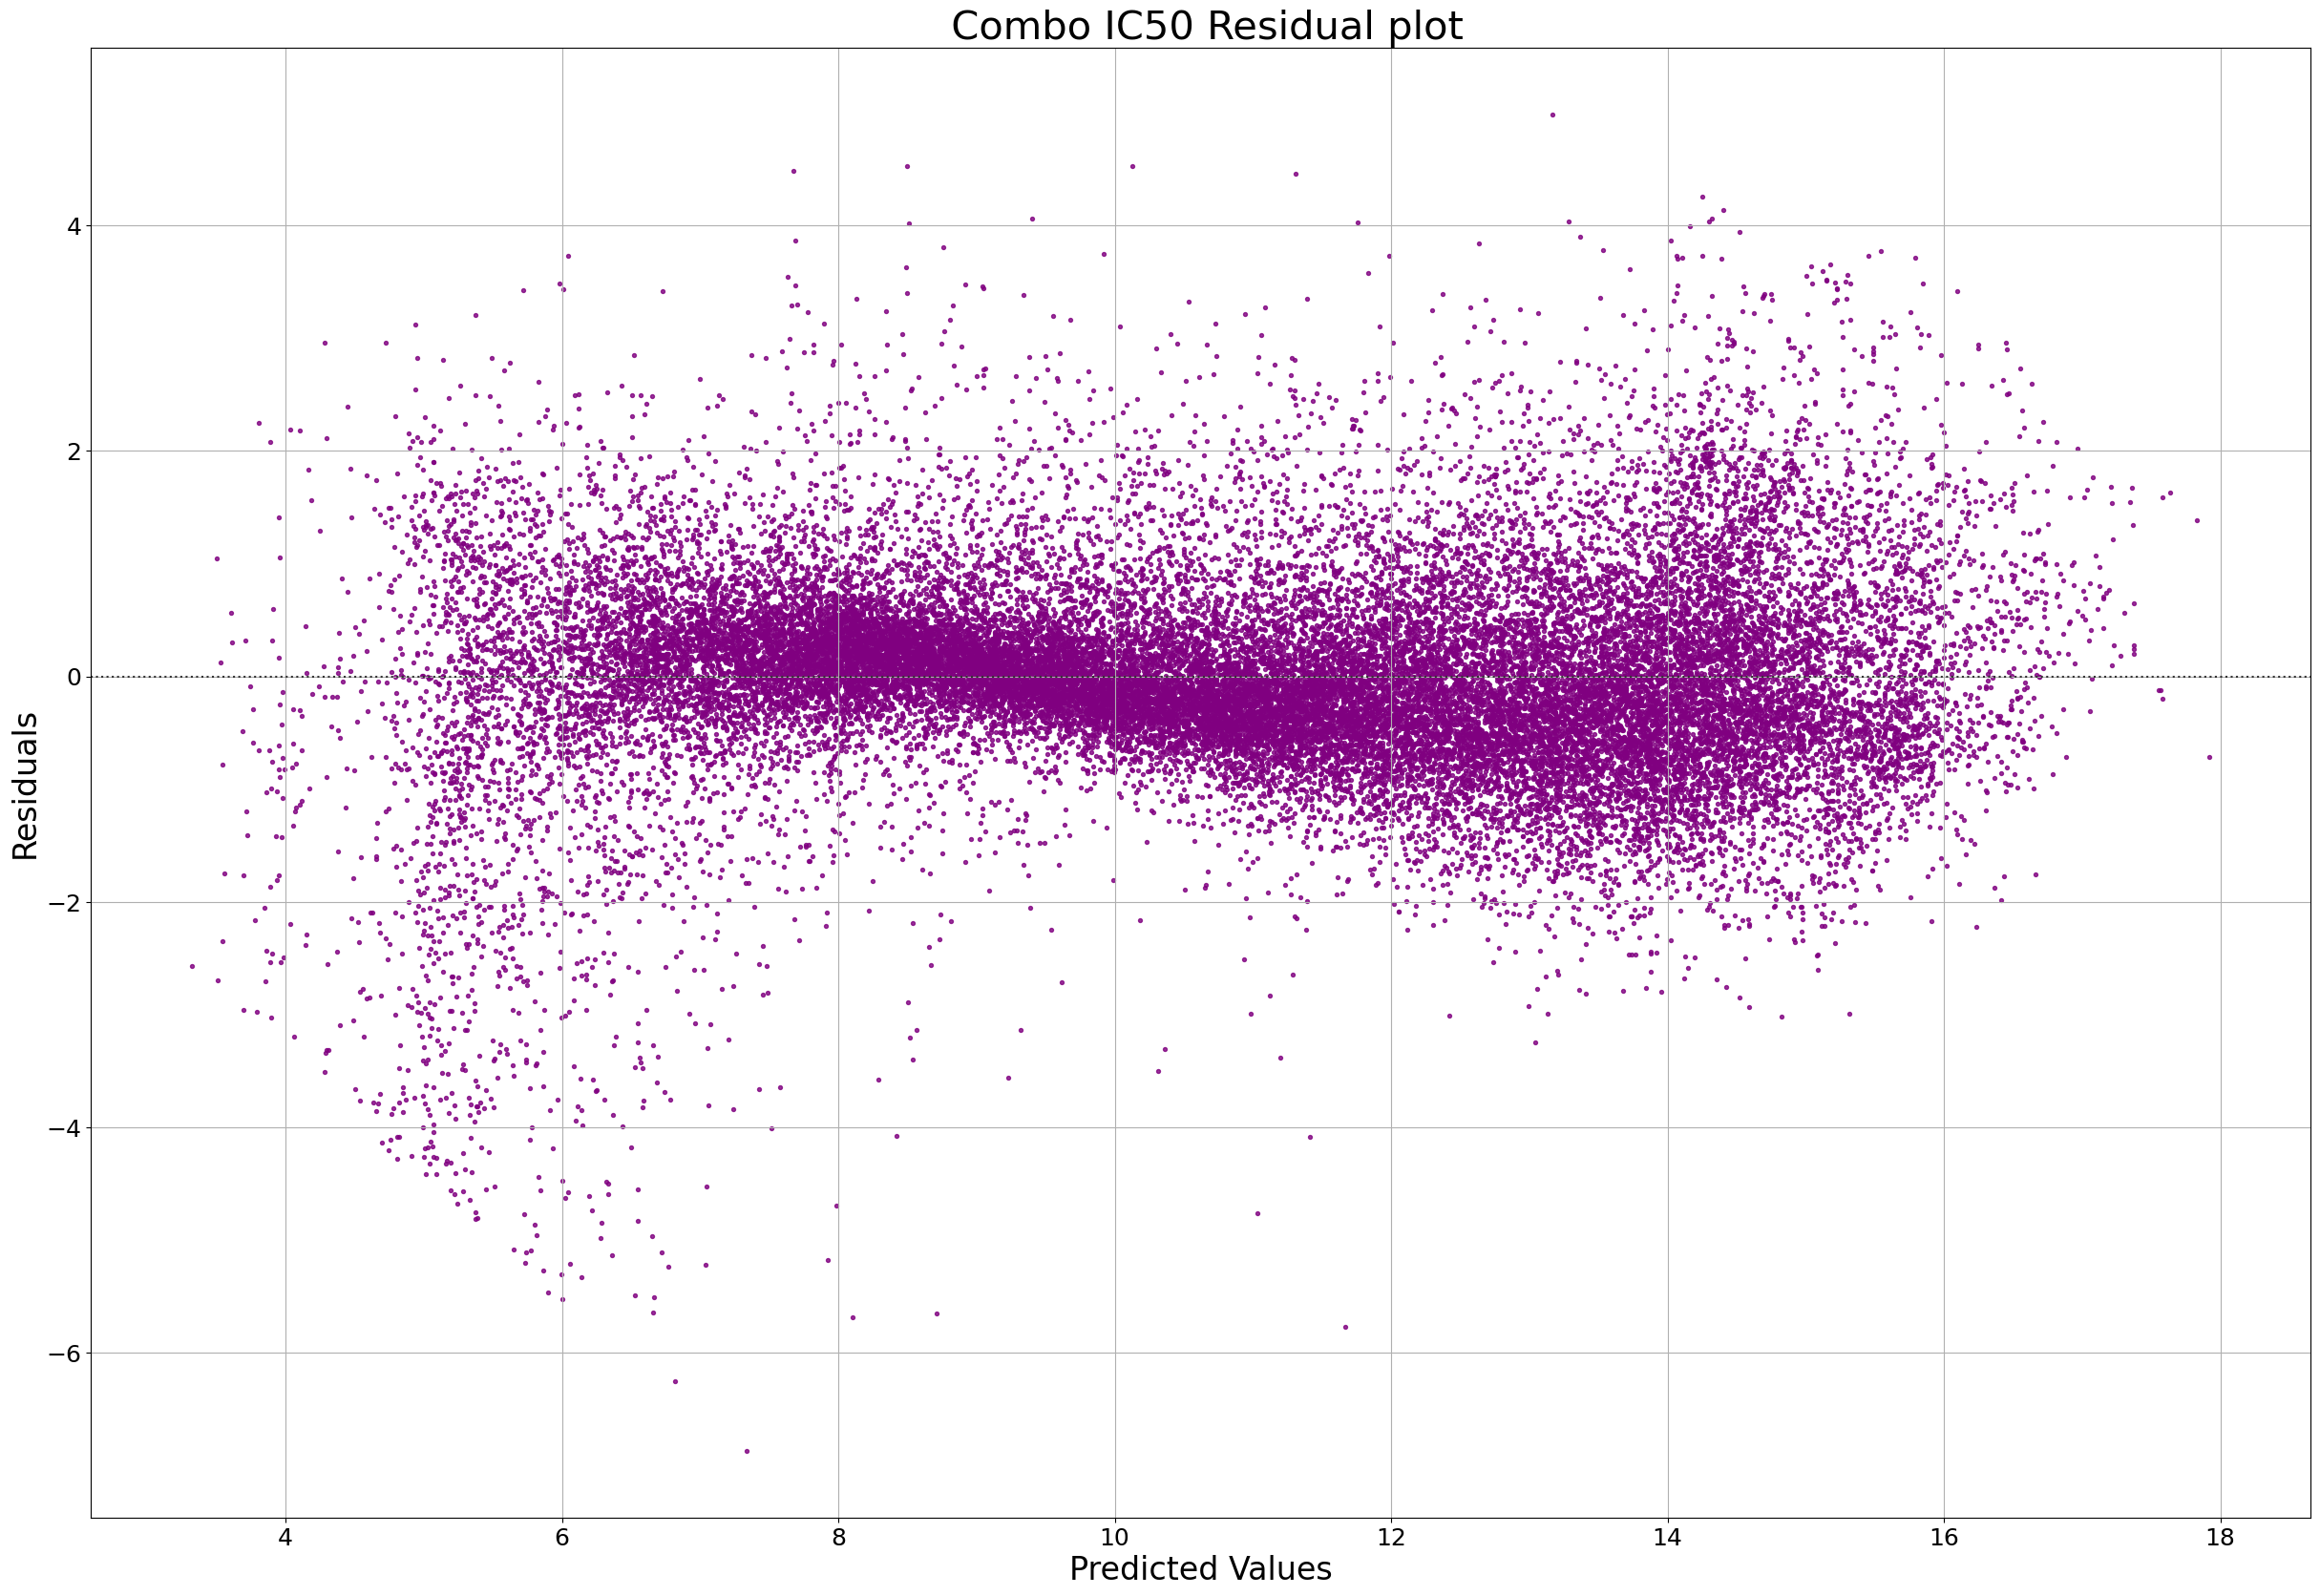

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Combo IC50 Regression Plot", fontsize=30)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

# residual plot

Y_test = np.array(Y_test)
Y_test = np.ravel(Y_test)
Y_pred
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = Y_test - Y_pred
residuals = pd.DataFrame(residuals)
residuals = np.ravel(residuals)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(Y_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=Y_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title(" Combo IC50 Residual plot", fontsize=30)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


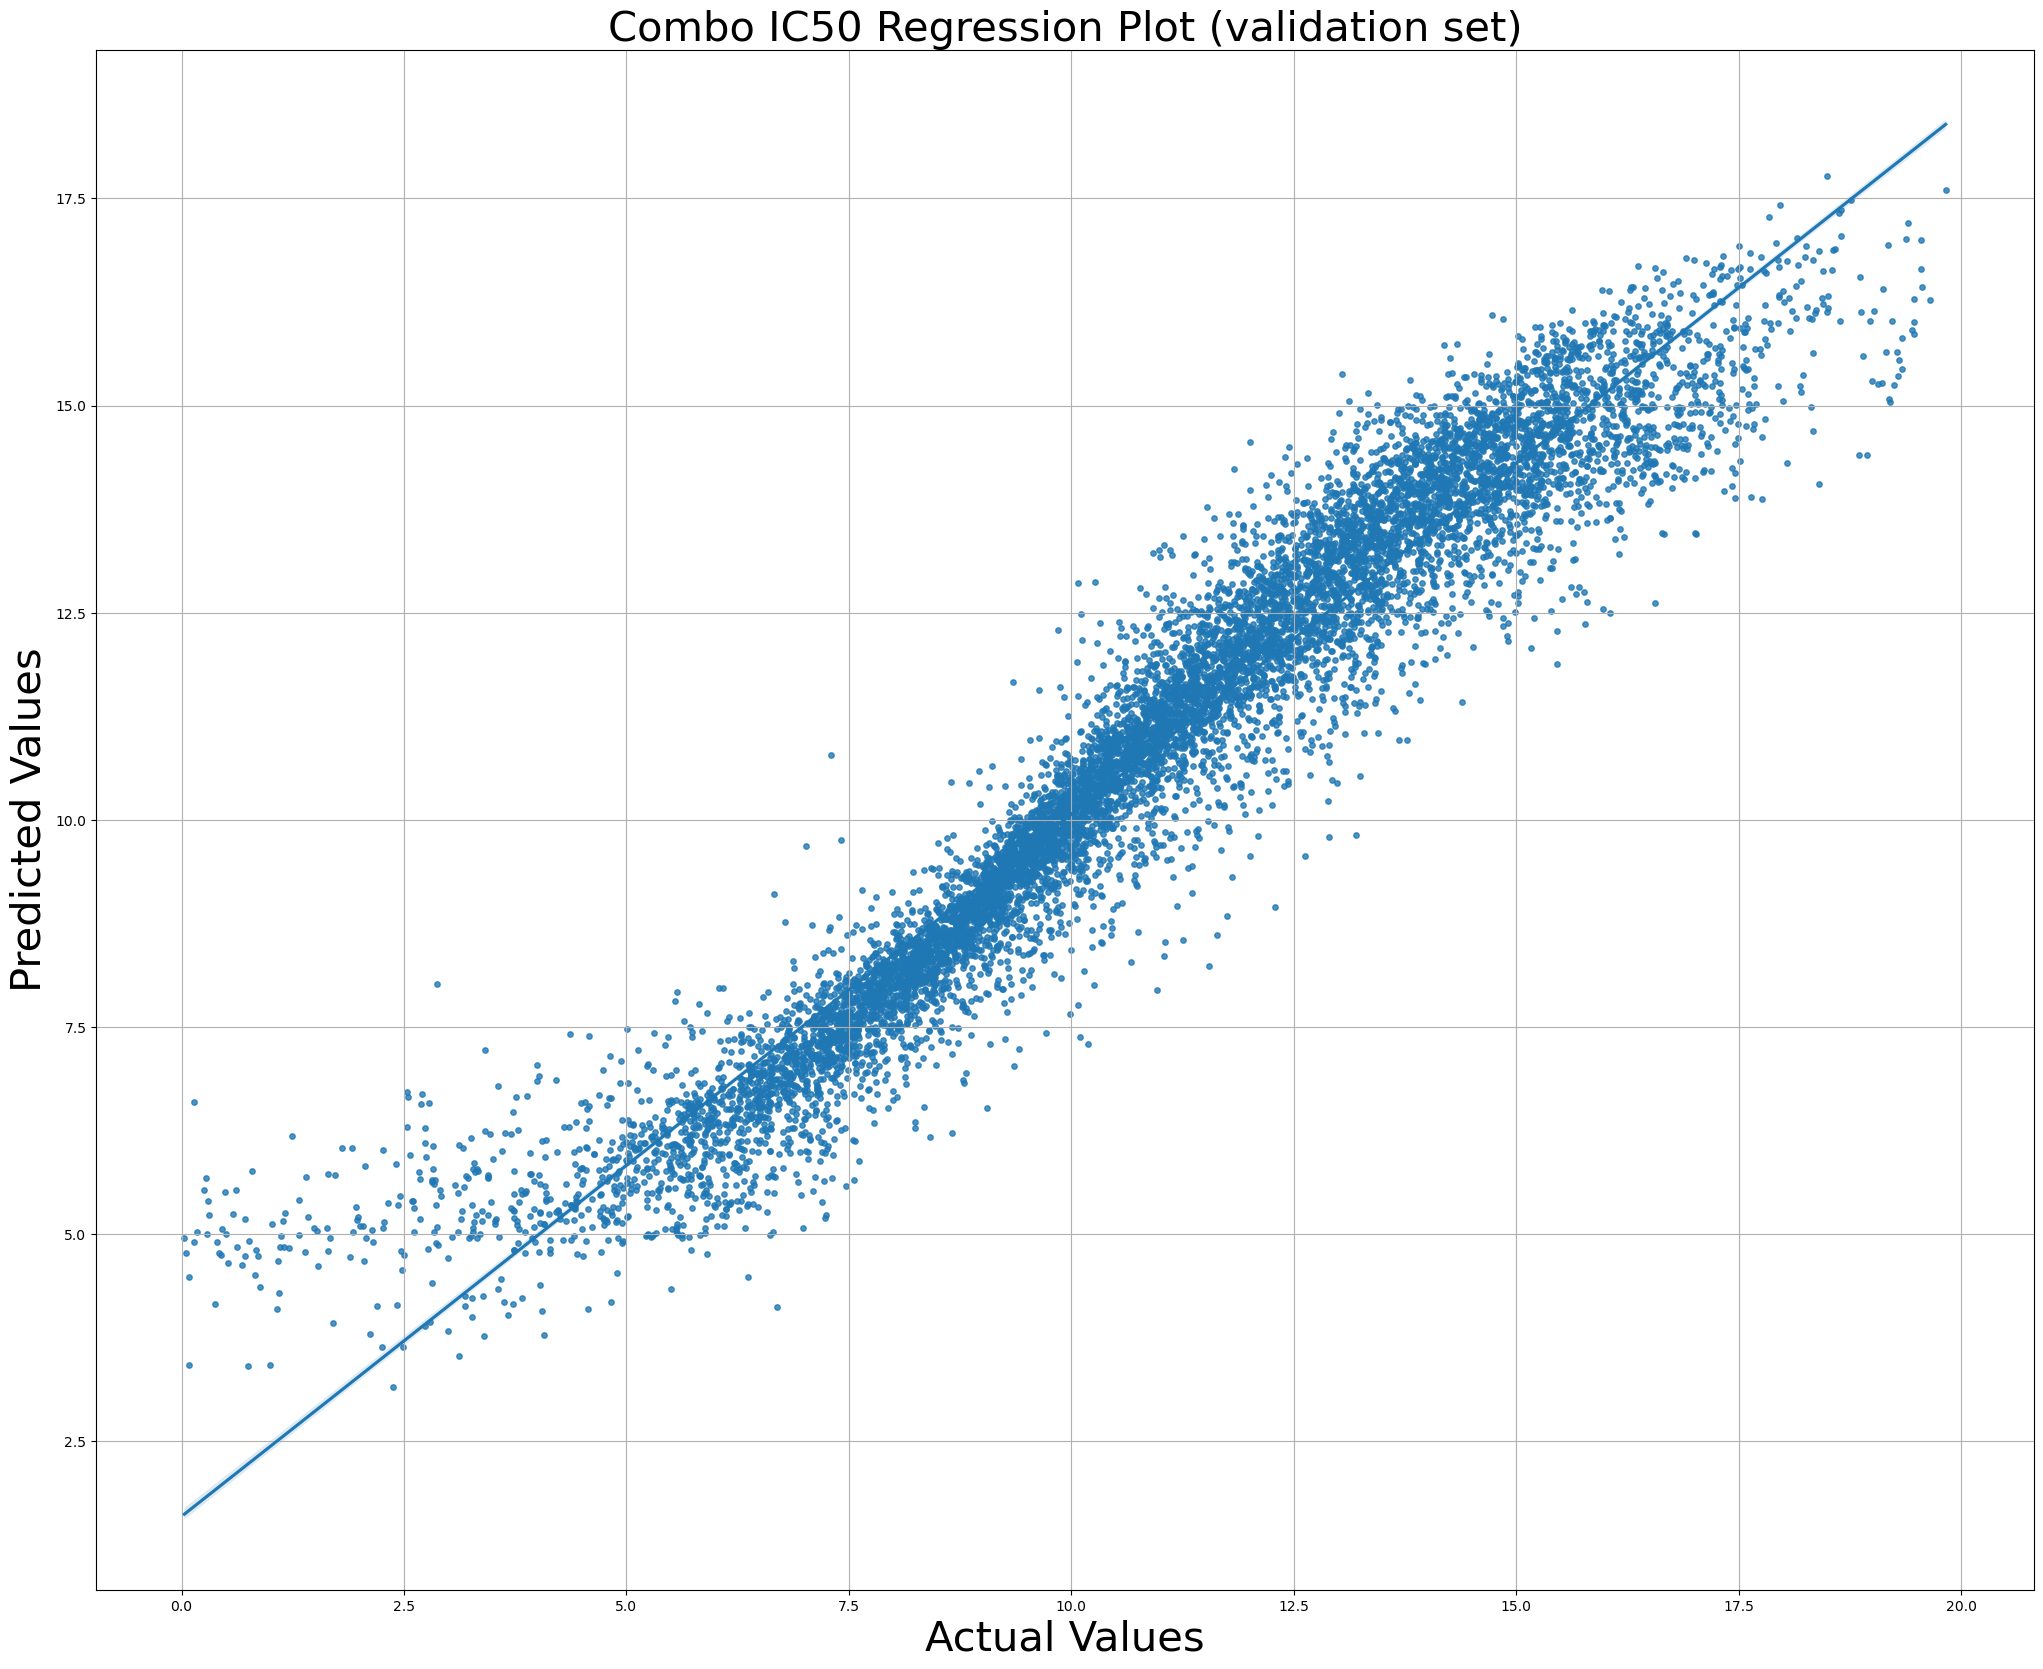

10000 10000


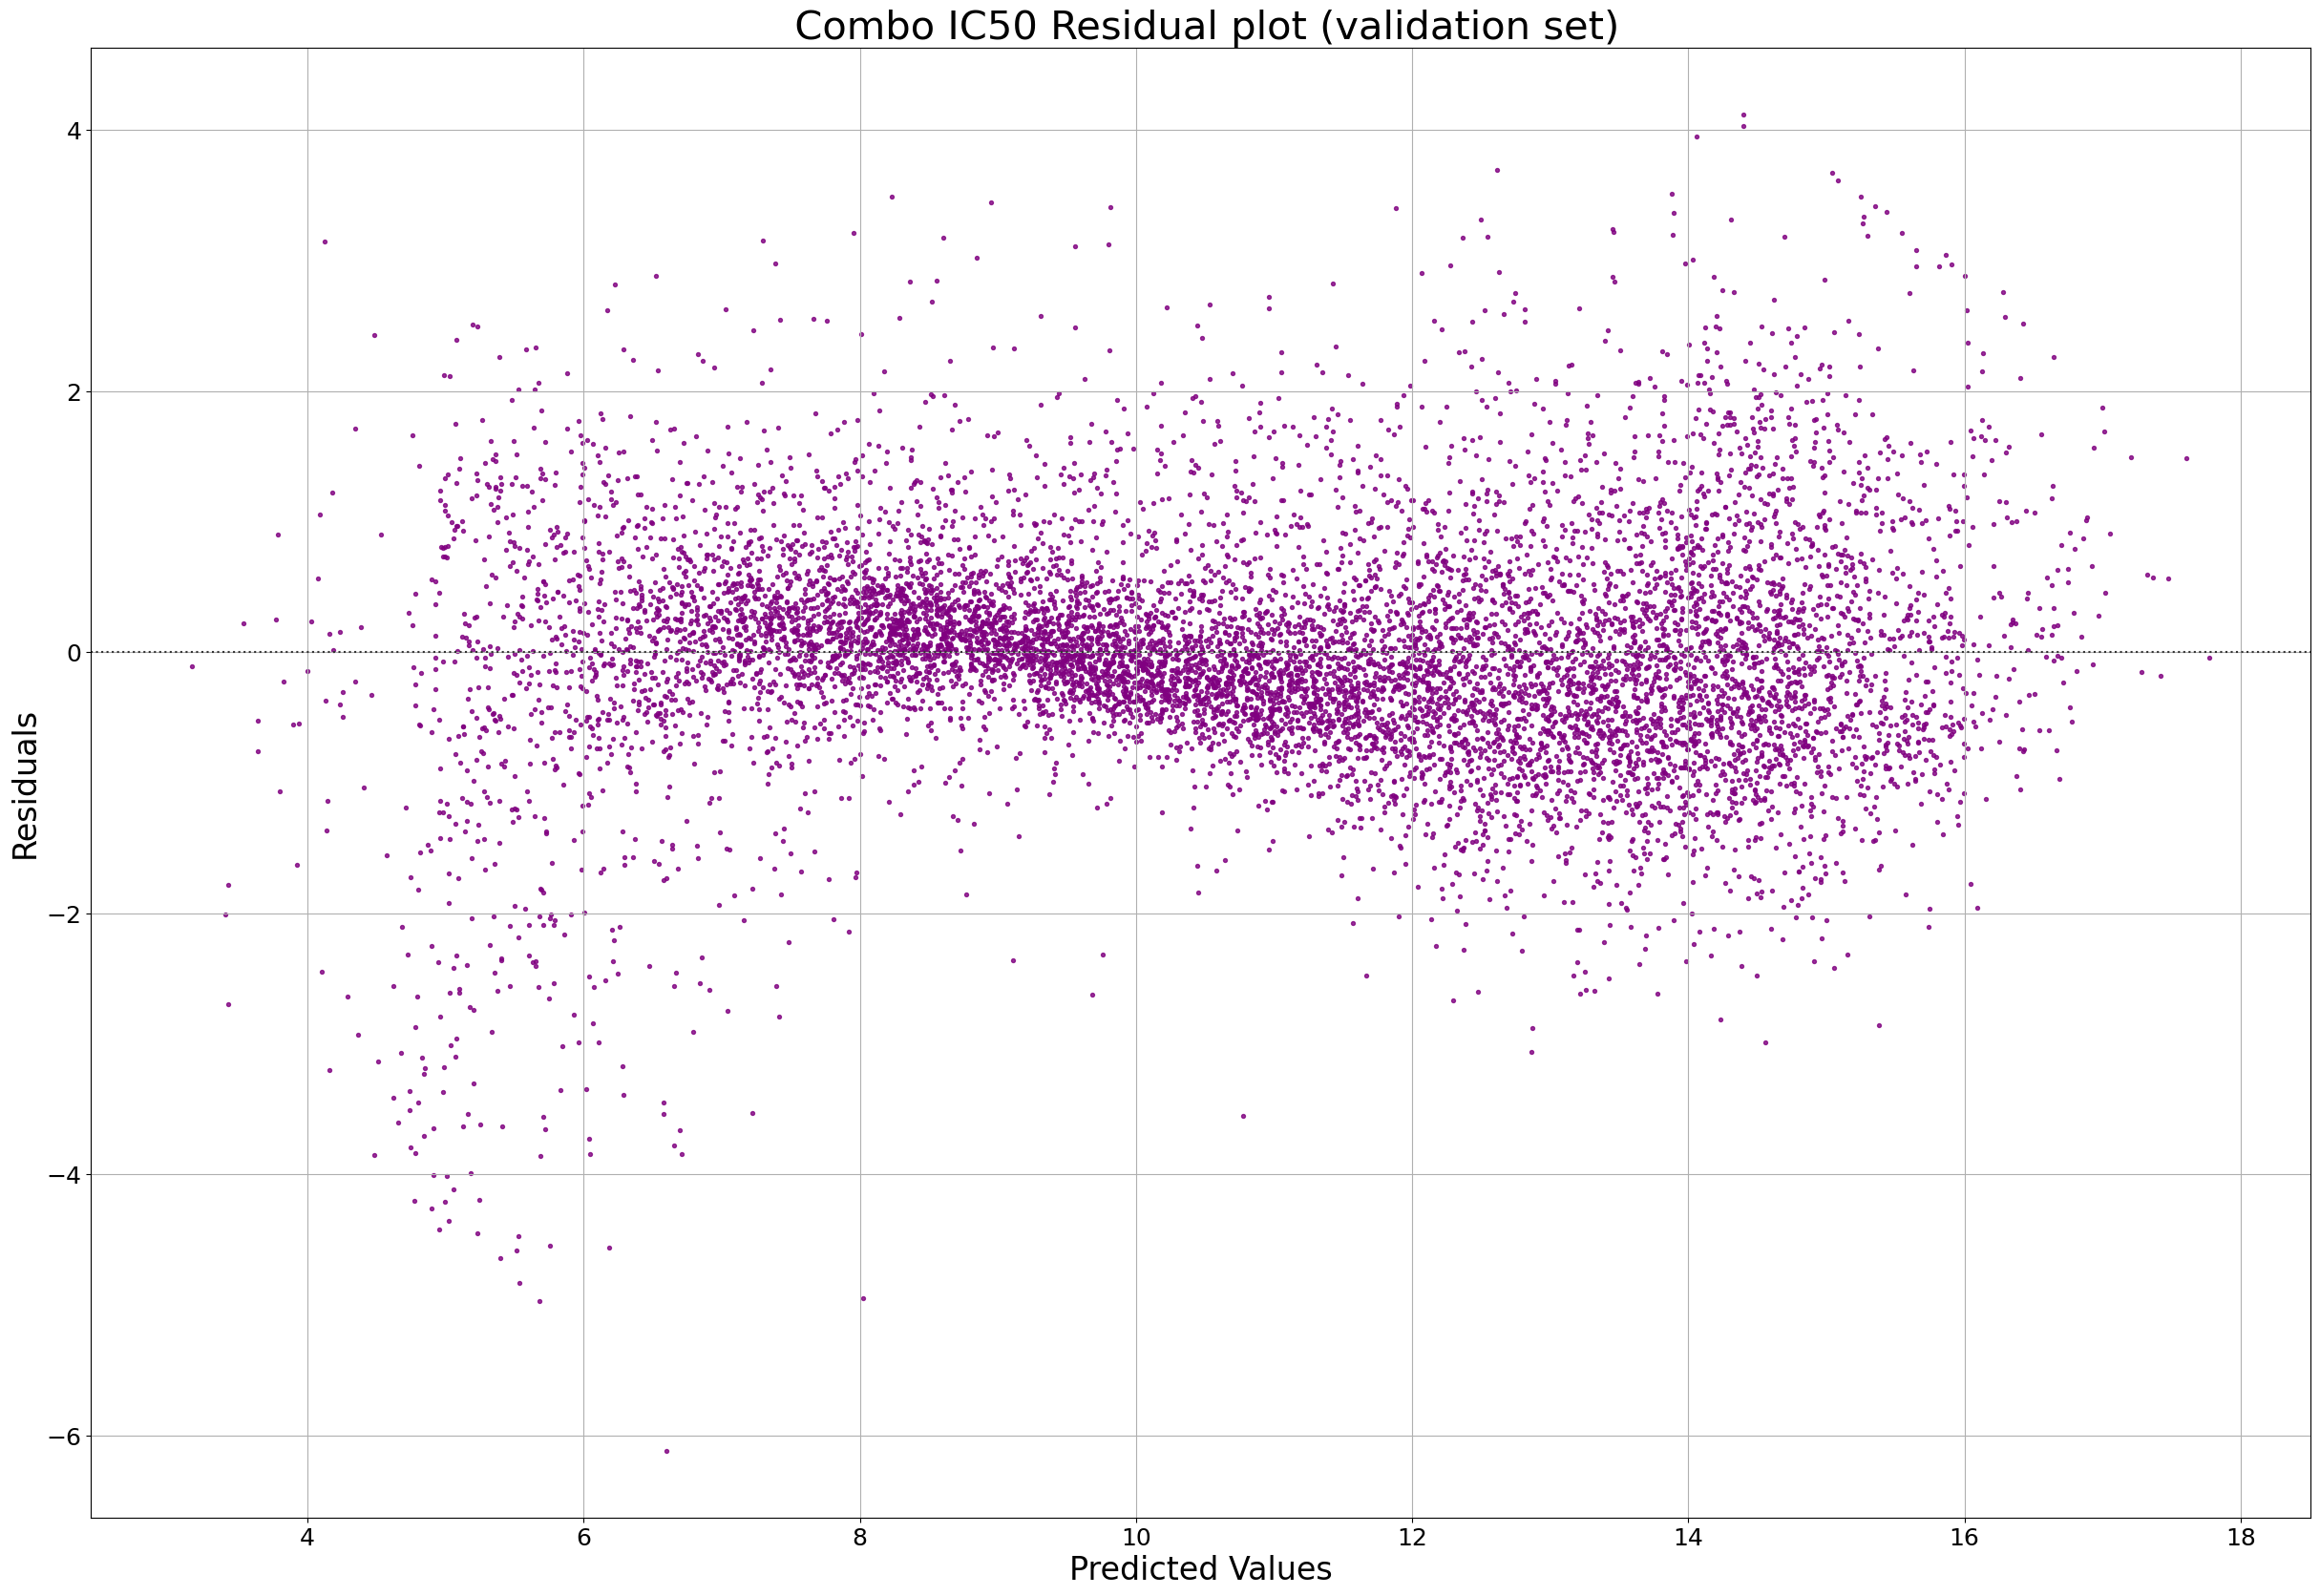

In [16]:
# plots for validation set
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=Y_valid, y=Y_valid_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Combo IC50 Regression Plot (validation set)", fontsize=30)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

# residual plot

Y_valid = np.array(Y_valid)
Y_valid = np.ravel(Y_valid)
Y_valid_pred
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = Y_valid - Y_valid_pred
residuals = pd.DataFrame(residuals)
residuals = np.ravel(residuals)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(Y_valid_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=Y_valid_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title(" Combo IC50 Residual plot (validation set)", fontsize=30)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()
